## Challenge: Crowd (Object) Counting

<img src="http://personal.ie.cuhk.edu.hk/~ccloy/images/shopping_mall_annotated.jpg" title="Crowd Counting" width="30%"/>

Para esta sección final se evaluará todo lo que han aprendido a través de un desafío en donde puedan competir y medir sus resultados *in time* en la plataforma de __[Kaggle](https://www.kaggle.com/)__. El problema y todo su detalle puede ser encontrado en la página de la competencia a través del siguiente link:


<center><H2> __[Competencia Object Counting](https://www.kaggle.com/t/59c93ca0e8ae47999f9287a5751d6402)__ </H2></center>



Para esto deberán crearse una cuenta en la plataforma *Kaggle* y subir sus respuestas a ésta. Por favor crearse nombres que sean fácil identificar después para saber quién fue quién, sino no podrán tener la nota (o en el correo de entrega ponen cual es su nombre de usuario en la competencia).

*Nota: El puntaje que entregará al estar participando en la competencia (menos de 2 puntos al *benchmark* que se presenta) y el lugar obtenido se presenta en la página de Kaggle.*

> Las entregas en *csv* pueden ser generadas de la siguiente manera:
```python
import pandas as pd
d = {'id': test_ids, 'count': prediction_test}
entrega = pd.DataFrame(data=d,columns=['id','count'])
entrega.to_csv('mysubmission.csv', index=False)
```

> Los archivos binarios de numpy pueden ser cargados facilmente con el siguiente comando:
```python
import numpy as np
dato = np.load('binary_file.npy')
```

> Las imagenes en python pueden ser cargadas con la librería Pillow y transformadas a numpy array con el siguiente comando:
```python
from PIL import Image
img = Image.open("path/to/image.jpg or png")
np.asarray(img)
```

In [43]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import *
from keras.models import Model,Sequential

/home/fefi/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Datos

In [4]:
img = Image.open("../frames_train/seq_000401.jpg")
np.asarray(img)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[150, 118,  95],
        [150, 118,  95],
        [150, 118,  95],
        ...,
        [203, 158, 117],
        [206, 161, 119],
        [206, 162, 117]],

       [[151, 119,  96],
        [151, 119,  96],
        [151, 119,  96],
        ...,
        [185, 140,  99],
        [189, 144, 102],
        [191, 146, 104]],

       [[149, 117,  94],
        [149, 117,  94],
        [149, 117,  94],
        ...,
        [170, 125,  84],
        [170, 125,  84],
        [170, 125,  83]]

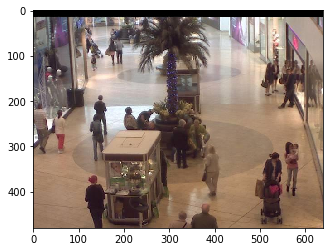

In [8]:
plt.imshow(img)
plt.show()

In [2]:
train = np.load('../images_train.npy')
test = np.load('../images_test.npy')

In [35]:
df_y = pd.read_csv("../labels_train.csv")

In [37]:
df_y.describe()

,id,count
count,1600.00000,1600.000000
mean,1200.50000,31.070625
std,462.02453,6.992134
min,401.00000,13.000000
25%,800.75000,26.000000
50%,1200.50000,30.000000
75%,1600.25000,35.000000
max,2000.00000,50.000000


In [39]:
df_y.head()

,id,count
0,401,29
1,402,30
2,403,31
3,404,26
4,405,26


In [6]:
print(train.shape)
print(test.shape)

(1600, 480, 640, 3)
(400, 480, 640, 3)


In [41]:
idx_test = np.random.choice(np.arange(len(train)), 300, replace=False)
mask_test = np.zeros(len(train),dtype=bool) 
mask_test[idx_test] = True 

X_train = train[~mask_test]
Y_train = df_y.values[~mask_test]
X_val = train[mask_test]
Y_val = df_y.values[mask_test]
X_test = test

In [42]:
print(len(X_train))
print(len(Y_train))
print(len(X_val))
print(len(Y_val))
print(len(X_test))

1300
1300
300
300
400


In [33]:
train[0][0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

## Arquitectura

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=weight,activation='sigmoid')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2)) 

#tercera capa
#aux.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
#aux.add(BatchNormalization())
#aux.add(MaxPooling2D(2,2)) 

model.add(Conv2D(1,(1,1),padding='same',activation='sigmoid',kernel_regularizer=weight))


model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=150,validation_data=(X_test, y_test),verbose=1)

In [48]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:],activation='relu'))
model2.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2,activation='softmax'))
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 480, 640, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 480, 640, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 240, 320, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 240, 320, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 240, 320, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 120, 160, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1228800)           0         
__________

In [ ]:
#train it
#optimizer_ = SGD(lr=0.01,momentum=0.9)
model2.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
model2.fit(X_train, Y_train, batch_size=128,epochs=15,verbose=1, validation_data=(X_val,Y_val))

Train on 1300 samples, validate on 300 samples
Epoch 1/15
